<a href="https://colab.research.google.com/github/JJang-likit/GoingDeeper_Aiffel/blob/main/GoingDeeper(Data_Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

- 딥러닝 모델을 학습시키기 위해서는 대량의 데이터를 확보해야 한다. 하지만 데이터를 몇 만 장씩 구축하는데는 많은 비용과 시간이 필요하다.
- 이런 문제를 해결하고 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있다.

## Data Augmentation (1) 개요

- data augmentation은 데이터셋을 여러 가지 방법으로 증강시켜 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다.
- 일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용한다.

## Data Agumentation (2) 다양한 Augmentation 방법

- 텐서플로우에서는 텐서플로우 API를 사용해 바로 적용할 수 있는 image augmentation 기법들을 제공하고 있다.

### Flipping
- Flip은 이미지를 대칭하는 기능이다.
- 분류 문제에서는 문제가 없을 수 있지만 물체 탐지(detection), 혹은 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 좌우 반전을 해주어야 한다.

### Gray scale
- Gray scale은 3가지 채널을 가진 RGB 이미지를 하나의 채널을 가지도록 해준다.

### Saturation
- Saturation은 RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도))의 3가지 성분으로 변경하고 S채널에 오프셋을 적용, 조금 더 이미지를 선명하게 만들어 준다.

### Brightness
- 우리가 주로 사용하는 RGB에서 값을 더해주면 밝아지고 빼주면 어두워진다.
- 이를 통해서 Brightness를 변경할 수 있다.

### Rotation
- Rotation은 이미지의 각도를 변환해준다.
- 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해주면 바로 사용이 가능하다.
- 하지만 90도가 아닌 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 한다.

### Center Crop
- center crop은 이미지의 중앙을 기준으로 확대하는 방법이다.
- 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 생기기 때문에 조심해야 한다.

### 그 외 방법
- Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring

In [24]:
# image augmentation 실습(1) Flip
# 라이브러리 불러오기

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
/pwd

'/content'

In [26]:
import tensorflow as tf
import PIL.Image as pil
import matplotlib.pyplot as plt
import os


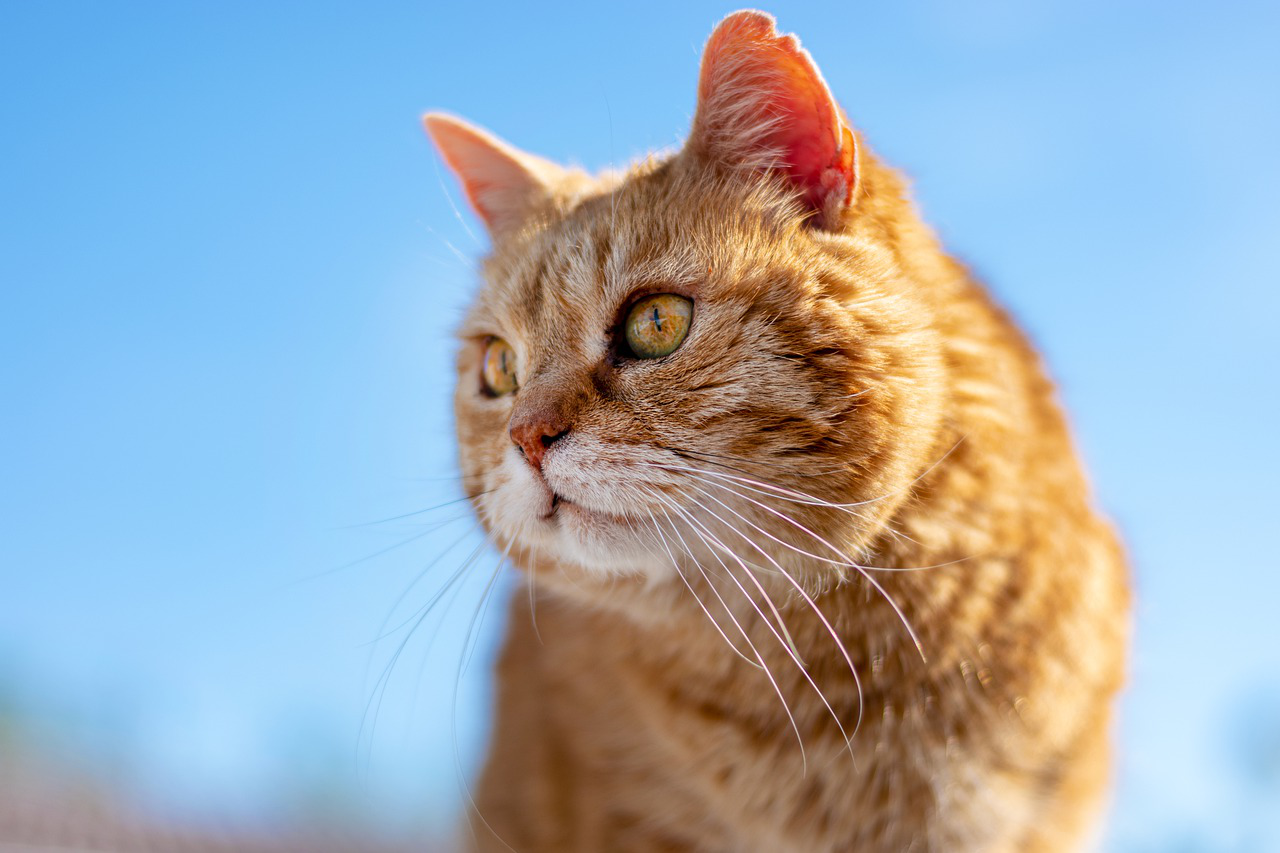

In [27]:
img_path = '/content/gdrive/MyDrive/mycat.jpg'
img = pil.open(img_path)
img

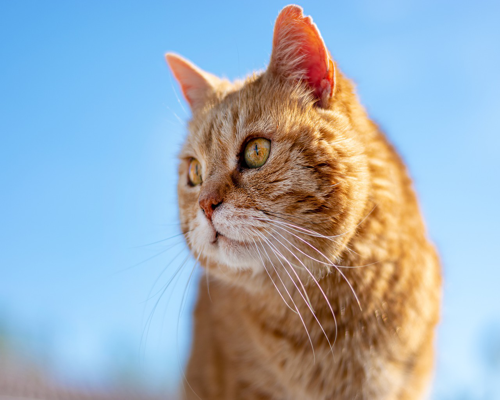

In [28]:
image = img.resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip 적용해보기
-  Flip은 flip_left_right와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분된다.

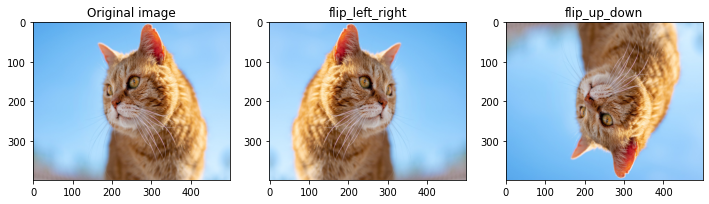

In [29]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

- 위의 함수들은 일괄적으로 상하 또는 좌우 반전을 적용한다.
- 우리는 이를 확률에 따라서 적용되도록 해야한다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이다.
- 이를 위해서 활용할 수 있는 것이 random_flip_left_right와 random_flip_up_down이다. 필요에 따라서는 직접 이 둘을 합쳐서 random_flip으로 상하좌우 반전을 적용하는 함수를 직접 만들 수 있다.

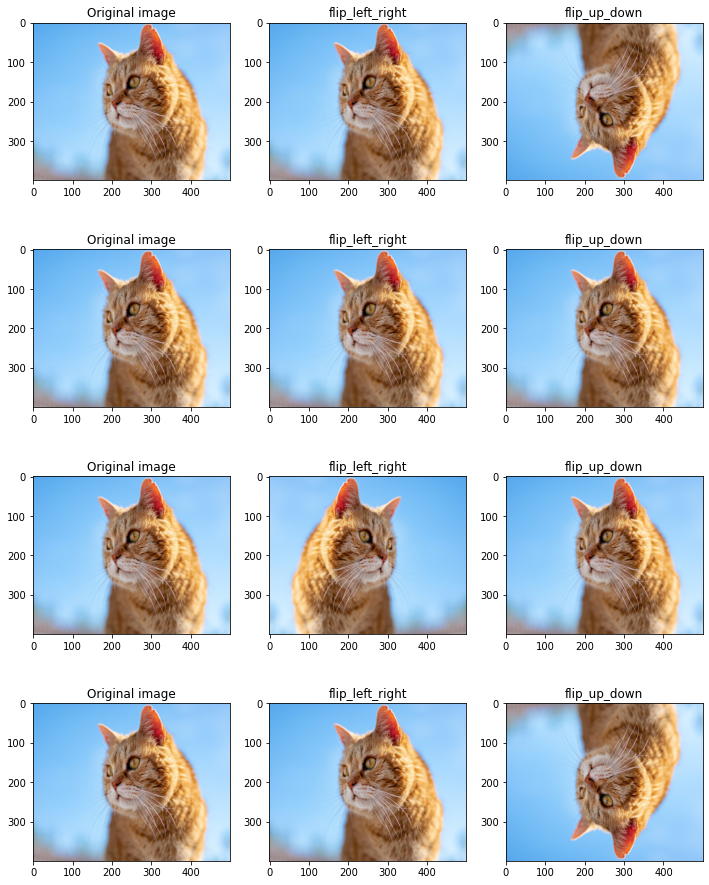

In [30]:
# random flip 함수

plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### Center Crop 적용해보기
- center crop은 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법이다.
- central_fraction은 얼마나 확대할지 조절하는 매개변수이다.
- 1.0의 경우 원본 이미지와 같다. 하지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있기 때문에 주의해야 한다.
- central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 한다.

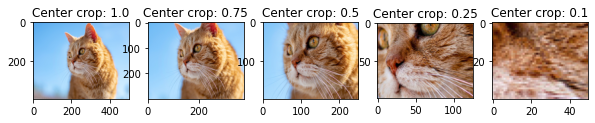

In [31]:
plt.figure(figsize = (12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
  cropped_tensor = tf.image.central_crop(image_tensor, frac)
  cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

  plt.subplot(1,col+1,i+1)
  plt.title(f'Center crop: {frac}')
  plt.imshow(cropped_img)

- 랜덤하게 central_crop을 적용하는 함수는 텐서플로우에서 제공되지 않는다.
- 파이썬의 random 모듈을 사용하거나 텐서플로우의 랜덤 모듈을 사용해야 한다.

In [32]:
# tf.random.uniform을 사용해서 random_central_crop() 함수를 만든다.

def random_central_crop(image_tensor, range=(0, 1)):
  central_fraction = tf.random.uniform([1], minval = range[0], maxval = range[1], dtype = tf.float32)
  cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
  return cropped_tensor

print('good')

good


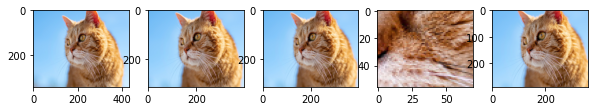

In [33]:
plt.figure(figsize = (12,15))

col = 5
for i, frac in enumerate(central_fractions):
  cropped_tensor = random_central_crop(image_tensor)
  cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

  plt.subplot(1,col+1,i+1)
  plt.imshow(cropped_img)

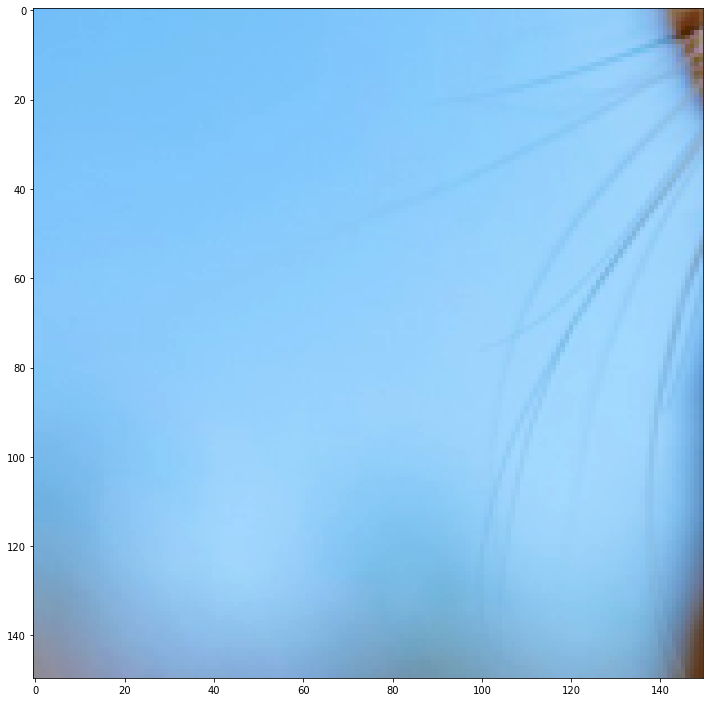

In [34]:
# tf.image.fandom_Crop 이용하기

plt.figure(figsize = (12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor, [150, 150, 3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

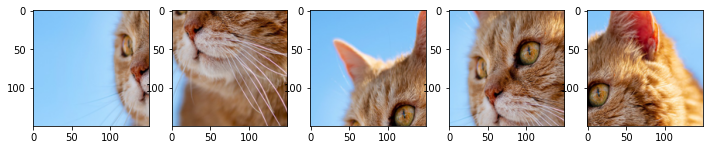

In [35]:
plt.figure(figsize = (12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor, [150,150,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

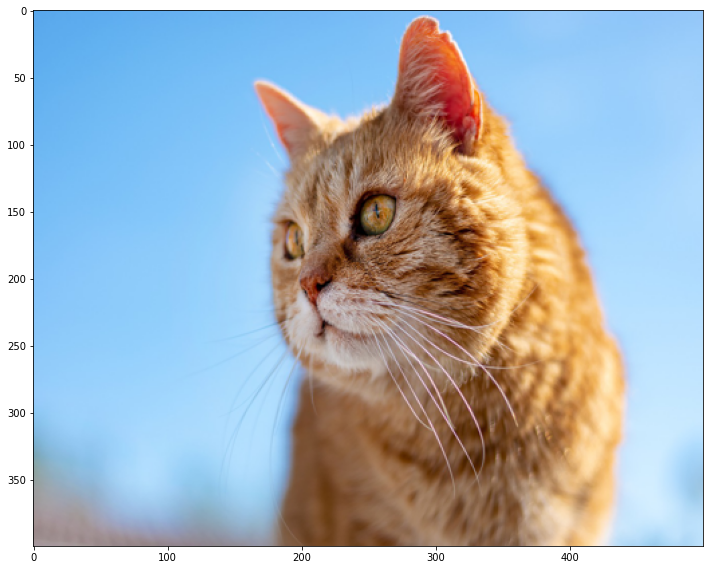

In [36]:
# tf.image.random_brightness 이용하기

plt.figure(figsize = (12,15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta = 128)
random_bright_tnesor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

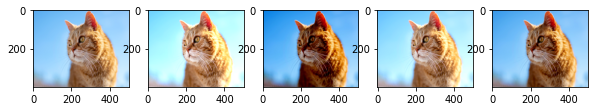

In [37]:
plt.figure(figsize=(12,15))

col = 5
for i in range(5):
  random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta = 128)
  random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
  random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

  plt.subplot(1,col+1,i+1)
  plt.imshow(random_bright_image)

### albumentations 라이브러리 사용하기
- augmentation만을 모아서 제공하는 전문 라이브러리 중 Albummentations 라이브러리를 활용하면 이미지 증강을 할 수 있다.
- Albummentations 라이브러리를 사용하기 위해서는 PIL Image 데이터형을 넘파이 배열로 변환해줘야 한다.

In [38]:
import numpy as np

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

In [39]:
def visualize(image):
  plt.figure(figsize = (20,10))
  plt.imshow(image)

In [ ]:
import albumentations as A

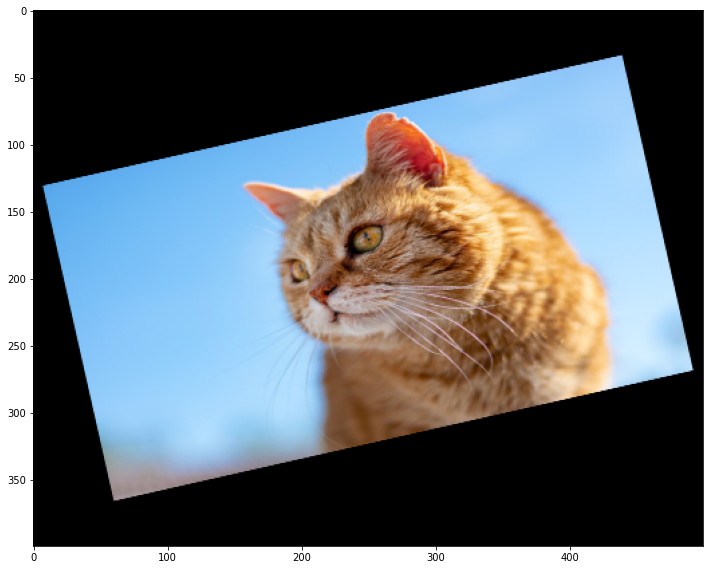

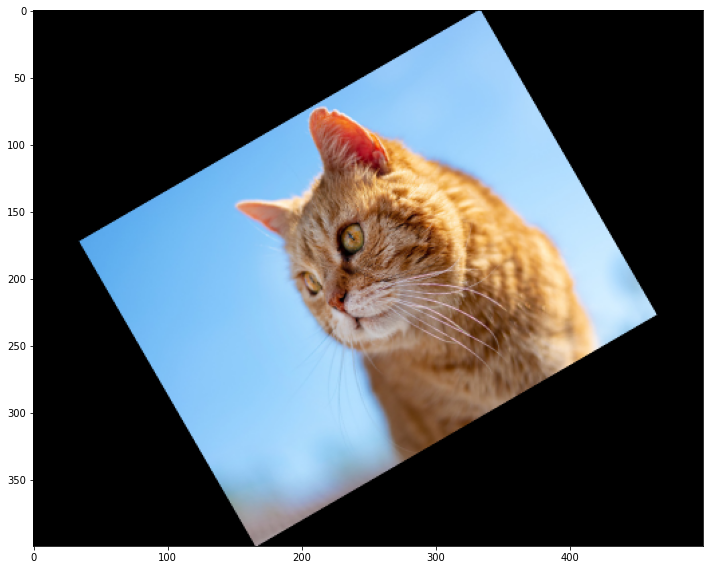

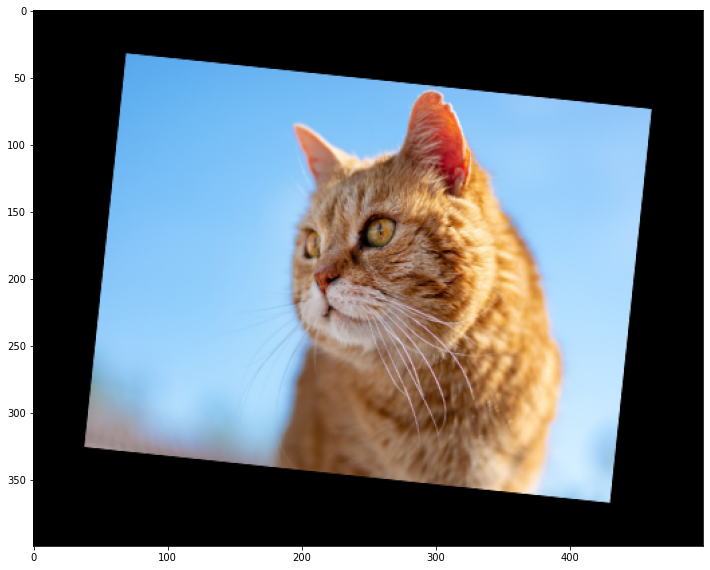

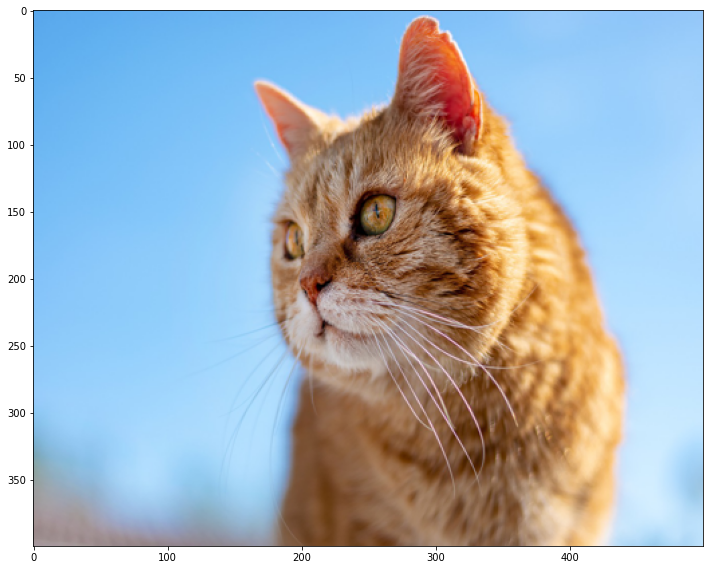

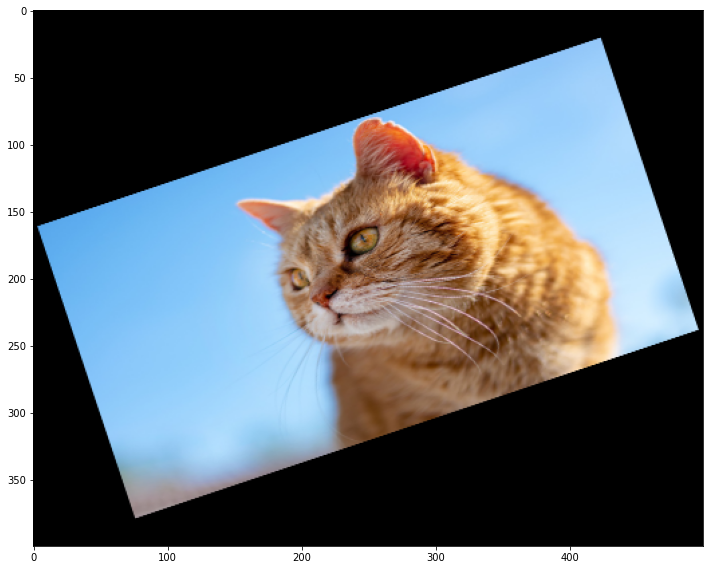

In [42]:
# transforms.Affine()은 2D 변환의 일종으로 이미지의 스케일을 조절하거나 평행이동, 회전 등의 변환을 줄 수 있다.



for i in range(5):
  transform = A.Compose([A.Affine(rotate = (-45, 45), scale = (0.5, 0.9), p = 0.5)])
  transformed = transform(image = image_arr)

  plt.figure(figsize = (12, 12))
  plt.imshow((transformed['image']))
  plt.show()

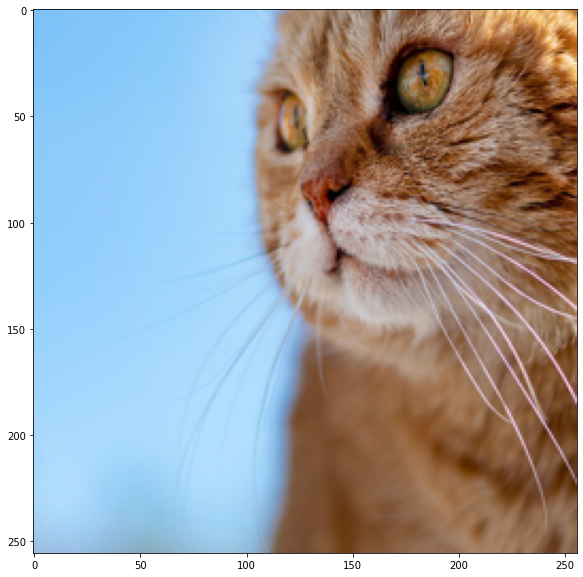

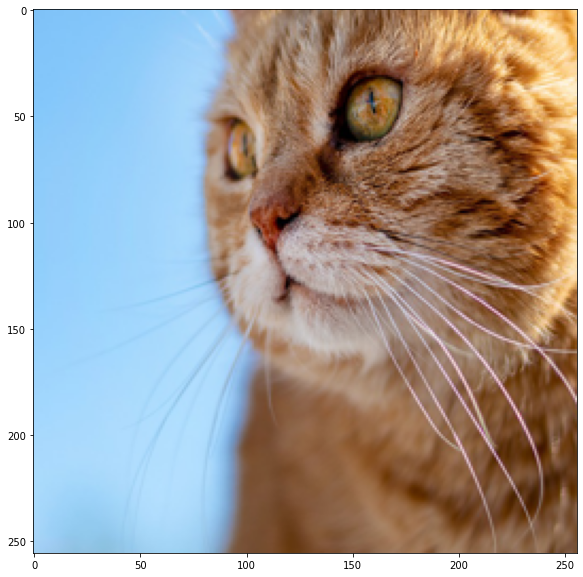

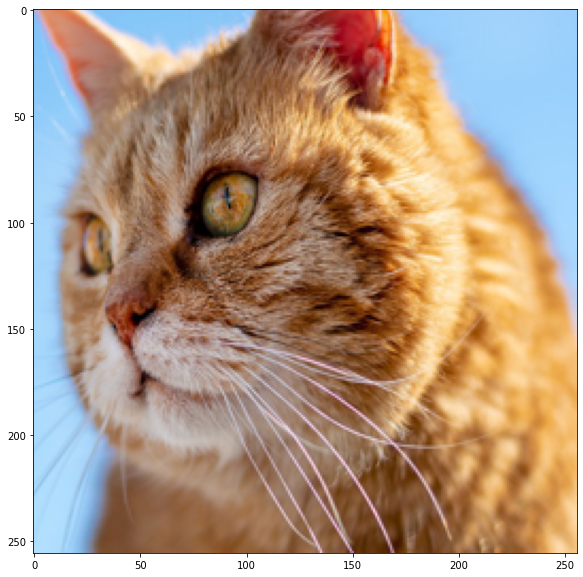

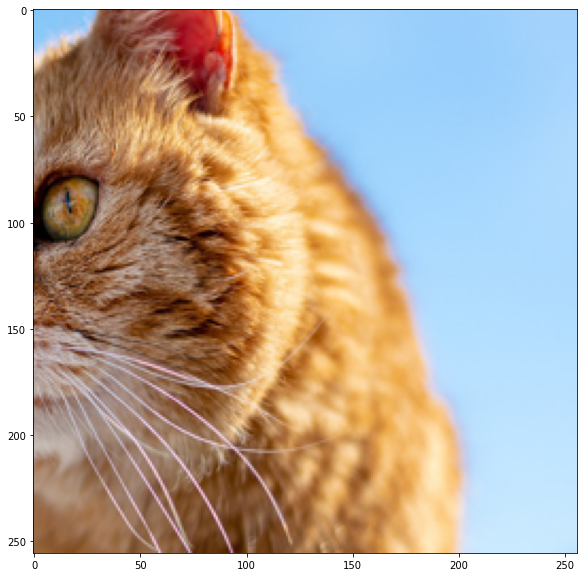

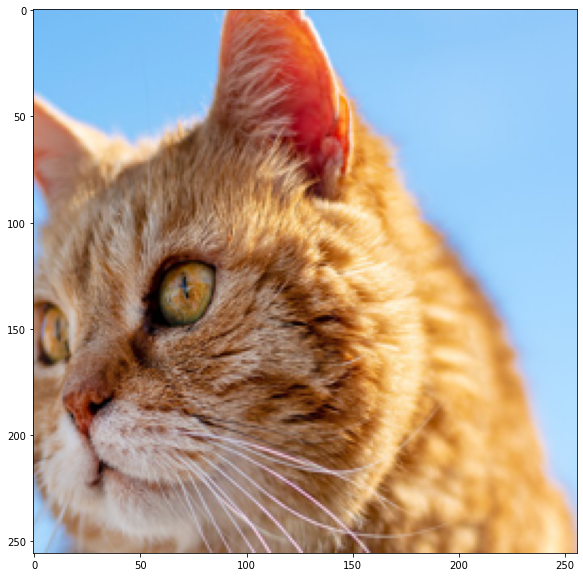

In [44]:
# transforms.RandomCrop() 사용하기

import random

for i in range(5):
  transform = A.Compose([A.RandomCrop(width = 256, height = 256)])
  transformed = transform(image = image_arr)
  visualize(transformed['image'])

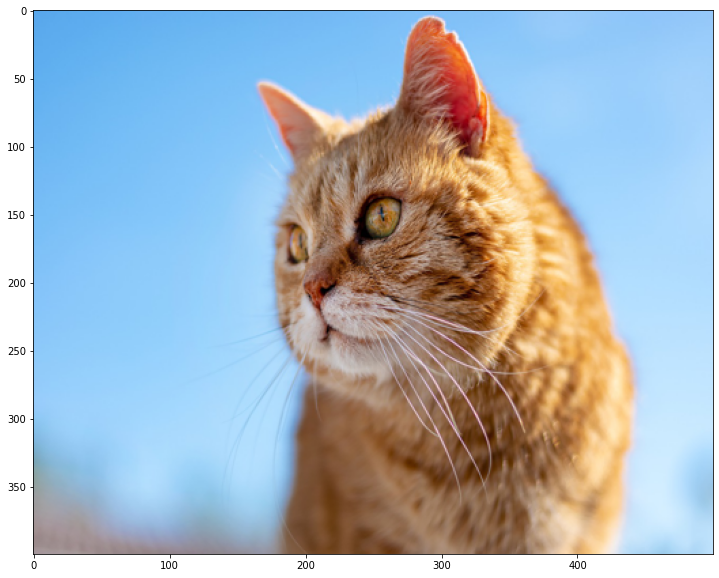

In [45]:
# MedianBlur()을 사용하면 블러처리를 쉽게 할 수 있다.

transform = A.Compose([A.MedianBlur(blur_limit = 7, always_apply = False, p = 0.5)])
transformed = transform(image = image_arr)
visualize(transformed['image'])

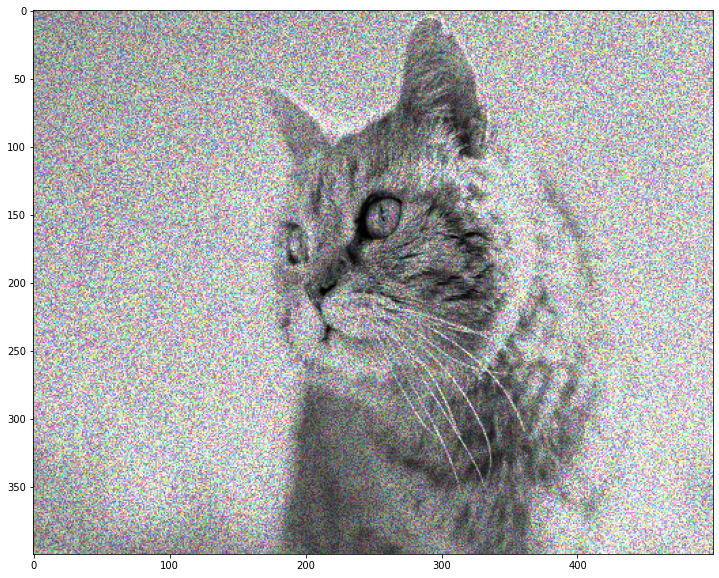

In [46]:
# ToGray(), MultiplicativeNoise()를 쓰면 augmentation 기법들을 한번에 조합해서 사용할 수 있다.

transform = A.Compose([A.ToGray(p=1), A.MultiplicativeNoise(multiplier = [0.5, 1.5], elementwise = True, per_channel = True, p = 1)])
transformed = transform(image = image_arr)
visualize(transformed['image'])

### 마무리
- 지금까지 보아왔던 방식은 딥러닝이 아닌 일정학 수학적 알고리즘을 이용한 augmentation이다.
- 하지만 딥러닝이 발달함에 따라서 data augmentation에도 딥러닝을 활용하는 방식이 개발되고 있다.
- 대표적으로 GAN을 data augmentatation에 활용할 수 있다.
- 간단한 예로 전통적인 색상 변환 대신 스타일 트랜스퍼 모델을 적용할 수 있다.